# Анализ вакансий DS и DA

**Описание проекта:** <br>

Исследование вакансий Data Scientist и Data Analyst.

**Цель исследования:** <br>

Показать чем различаются предлагаемые вакансии Data Scientist и Data Analyst.

**План работы:**

1) Загрузим данные и подготовим их к анализу.
2) Проведем исследовательский анализ данных.
3) Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science.
4) Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
5) Определение типичного места работы для Аналитика данных и специалист по Data Science по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
6) Расчет помесячной динамики количества вакансий для Аналитика данных и специалиста по Data Science. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
7) Формулирование выводов и рекомендаций.
8) Создание презентации.

**Описание данных:**

В нашем распоряжении два датасета о активных вакансиях представленных на сайте HH.ru 13.05.2024 за моследний месяц. Данные получены из API HH.ru.

`da.csv` - вакансии аналитиков данных<br>
`ds.csv` - вакансии датасаентистов

Столбцы в двух таблицах идентичны:

- `id` -  уникальный номер вакансии
- `name` - название вакансии
- `published_at` - дата публикации вакансии(Для каждой вакансии мы сохраням только первую дату публикации)
- `alternate_url` - ссылка на вакансию
- `type` - тип вакансии
- `employer` - работодатель
- `department` - подразделение работодателя
- `area` - регион вакансии
- `experience` - требуемый опыт работы
- `key_skills` - требуемые скиллы
- `schedule` - график работы
- `employment` - тип занятости
- `description` - подробное описание вакансии
- `salary_from` - зарплата от
- `salary_to` -  зарплата до
- `currency_salary` - валюта зарплаты

---

## Загрузка данныx и подготовка их к анализу

---

In [191]:
import warnings
import pandas as pd
from pymystem3 import Mystem
import numpy as np
from tqdm.notebook import tqdm
import re

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib import rcParams
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from collections import Counter
import requests

warnings.filterwarnings("ignore", "use_inf_as_na")
sns.set_theme(style="whitegrid", palette="pastel")

---

### Общая информация о данных

---

Посмотрим как выглядят данные

In [2]:
# приведем published_at сразу в формат даты
da = pd.read_csv('data/da.csv', parse_dates=['published_at'])
da.sample(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to,currency_salary
371,98442079,Аналитик хранилища данных,2024-05-06 10:07:18+03:00,https://hh.ru/vacancy/98442079,Открытая,Т1,ГК Иннотех | Финтех (Иннотех),Москва,От 3 до 6 лет,"['Работа с базами данных', 'ORACLE', 'Teradata...",Полный день,Полная занятость,Обязанности: Разработка прототипов клиентских...,NaN,NaN,NaN
266,95141352,Системный аналитик/Аналитик данных (DWH),2024-04-17 10:38:47+03:00,https://hh.ru/vacancy/95141352,Открытая,Деко Системс,NaN,Москва,От 1 года до 3 лет,"['PL/SQL', 'Системный анализ', 'PostgreSQL', '...",Удаленная работа,Полная занятость,Мы создаем уникальную аналитическую платформу ...,NaN,NaN,NaN
446,96020453,Аналитик баз данных SQL,2024-04-30 15:29:53+03:00,https://hh.ru/vacancy/96020453,Открытая,ИЦ АЙ-ТЕКО,NaN,Москва,От 3 до 6 лет,"['SQL', 'Hadoop', 'Hive', 'Spark', 'DWH', 'BI'...",Полный день,Полная занятость,КОМПАНИЯ «АЙ-ТЕКО» - ведущий российский систем...,NaN,NaN,NaN
696,98088004,BI-аналитик/ Аналитик данных,2024-05-12 17:09:30+03:00,https://hh.ru/vacancy/98088004,Открытая,Сэлвим,NaN,Москва,От 1 года до 3 лет,[],Полный день,Полная занятость,ОБЯЗАННОСТИ: Сбор бизнес-требований от внутре...,NaN,NaN,NaN
342,97595182,Аналитик данных (г. Нижнекамск),2024-04-22 09:58:04+03:00,https://hh.ru/vacancy/97595182,Открытая,Ай-Пласт,NaN,Нижний Новгород,От 3 до 6 лет,"['Коммуникативная гибкость', 'Системность мышл...",Полный день,Полная занятость,Ай-Пласт — лидирующее российское предприятие п...,137000.0,NaN,RUR


In [3]:
# приведем published_at сразу в формат даты
ds = pd.read_csv('data/ds.csv', parse_dates=['published_at'])
ds.sample(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to,currency_salary
21,98793763,"Data Scientist, Контент и товары",2024-05-13 12:50:35+03:00,https://hh.ru/vacancy/98793763,Открытая,Ozon,Ozon Информационные технологии,Москва,От 1 года до 3 лет,"['Python', 'PyTorch']",Полный день,Полная занятость,Ozon marketplace – одно из самых перспективных...,NaN,NaN,NaN
162,98798180,Senior Data Scientist (Прогноз заказов),2024-05-13 13:22:58+03:00,https://hh.ru/vacancy/98798180,Открытая,Samokat.tech,NaN,Москва,От 3 до 6 лет,[],Удаленная работа,Полная занятость,Для эффективной работы сервисов мы активно исп...,NaN,NaN,NaN
393,95532126,Data Scientist (Pricing),2024-04-25 12:37:59+03:00,https://hh.ru/vacancy/95532126,Открытая,Lamoda Tech,NaN,Москва,От 3 до 6 лет,"['Python', 'Big Data', 'Machine Learning', 'Pr...",Гибкий график,Полная занятость,Мы в поиске Data Scientist в команду Pricing. ...,NaN,NaN,NaN
406,97571358,Data Scientist (Middle) с переездом в Южно-Сах...,2024-04-22 04:47:02+03:00,https://hh.ru/vacancy/97571358,Открытая,Сахалин - Остров Возможностей,NaN,Казань,От 1 года до 3 лет,[],Полный день,Полная занятость,Работа в городе Южно-Сахалинск. Удаленный форм...,NaN,350000.0,RUR
385,92539014,Data Scientist,2024-05-13 11:13:26+03:00,https://hh.ru/vacancy/92539014,Открытая,СберЛизинг,NaN,Москва,От 3 до 6 лет,[],Полный день,Полная занятость,Наша команда создает продукт «Онлайн-оценка им...,NaN,NaN,NaN


Можно заметить, что есть пустые списки в колонке `key_skills`.

---

Добавим флаговую переменную(которая будет принимать два значения "da" или "ds") и объеденим данные, чтобы на этапе обработке было удобнее с ними работать

In [4]:
# Создаем переменные
da['name_type'] = 'da'
ds['name_type'] = 'ds'

# объеденяем таблицы
vacancies = pd.concat((da, ds))
start_data_size = vacancies.shape[0]

---

Посмотрим общую информацию о датасете

In [5]:
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1406 entries, 0 to 437
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype                    
---  ------           --------------  -----                    
 0   id               1406 non-null   int64                    
 1   name             1406 non-null   object                   
 2   published_at     1406 non-null   datetime64[ns, UTC+03:00]
 3   alternate_url    1406 non-null   object                   
 4   type             1406 non-null   object                   
 5   employer         1406 non-null   object                   
 6   department       415 non-null    object                   
 7   area             1406 non-null   object                   
 8   experience       1406 non-null   object                   
 9   key_skills       1406 non-null   object                   
 10  schedule         1406 non-null   object                   
 11  employment       1406 non-null   object                   
 12

Видно что работодатели зачастую не вносят информацию о зарплате. 

---

### Поиск дубликатов

---

Мы хотим сравнить две группы аналитиков и датасаентистов. В наших данных есть смежные вакансии - Аналитик данных/Data Scientist, так как непонятно к какой группе их отнести, давайте посмотрим сколько этих данных в нашем датасете и удалим их.

In [6]:
grid = vacancies.name.str.lower().str.contains(r'data scien') \
    & (vacancies.name.str.lower().str.contains(r'analyst') \
    | vacancies.name.str.lower().str.contains(r'аналитик'))
vacancies[grid].sort_values(by='id')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to,currency_salary,name_type
200,92601521,Эксперт Группа аналитики и моделирования (Data...,2024-04-23 17:39:17+03:00,https://hh.ru/vacancy/92601521,Открытая,ВТБ Лизинг,NaN,Москва,От 1 года до 3 лет,"['Python', 'Математическое моделирование', 'Ма...",Полный день,Полная занятость,"Крупнейшая лизинговая компания в России, являе...",NaN,NaN,NaN,ds
617,92601521,Эксперт Группа аналитики и моделирования (Data...,2024-04-23 17:39:17+03:00,https://hh.ru/vacancy/92601521,Открытая,ВТБ Лизинг,NaN,Москва,От 1 года до 3 лет,"['Python', 'Математическое моделирование', 'Ма...",Полный день,Полная занятость,"Крупнейшая лизинговая компания в России, являе...",NaN,NaN,NaN,da
129,93849154,Аналитик данных (Data Analyst / Data Scientist),2024-04-19 09:13:46+03:00,https://hh.ru/vacancy/93849154,Открытая,Белгазпромбанк,NaN,Минск,От 1 года до 3 лет,[],Полный день,Полная занятость,ОАО “Белгазпромбанк” приглашает стать частью н...,NaN,NaN,NaN,da
55,93849154,Аналитик данных (Data Analyst / Data Scientist),2024-04-19 09:13:46+03:00,https://hh.ru/vacancy/93849154,Открытая,Белгазпромбанк,NaN,Минск,От 1 года до 3 лет,[],Полный день,Полная занятость,ОАО “Белгазпромбанк” приглашает стать частью н...,NaN,NaN,NaN,ds
112,94606498,Бизнес-аналитик со знанием SQL (удаленно)/Data...,2024-05-08 16:01:26+03:00,https://hh.ru/vacancy/94606498,Открытая,ПКБ,NaN,Москва,От 1 года до 3 лет,"['Работа в команде', 'SQL', 'Умение работать в...",Удаленная работа,Полная занятость,ПКБ — технологичная клиентоориентированная ком...,NaN,NaN,NaN,ds
326,94606498,Бизнес-аналитик со знанием SQL (удаленно)/Data...,2024-05-08 16:01:26+03:00,https://hh.ru/vacancy/94606498,Открытая,ПКБ,NaN,Москва,От 1 года до 3 лет,"['Работа в команде', 'SQL', 'Умение работать в...",Удаленная работа,Полная занятость,ПКБ — технологичная клиентоориентированная ком...,NaN,NaN,NaN,da
765,95707799,Аналитик / Data scientist,2024-05-12 13:03:16+03:00,https://hh.ru/vacancy/95707799,Открытая,ЭКОПСИ Консалтинг,NaN,Москва,От 1 года до 3 лет,[],Полный день,Полная занятость,ЭКОПСИ Консалтинг – лидер рынка управленческог...,NaN,NaN,NaN,da
271,95707799,Аналитик / Data scientist,2024-05-12 13:03:16+03:00,https://hh.ru/vacancy/95707799,Открытая,ЭКОПСИ Консалтинг,NaN,Москва,От 1 года до 3 лет,[],Полный день,Полная занятость,ЭКОПСИ Консалтинг – лидер рынка управленческог...,NaN,NaN,NaN,ds
186,95805024,Аналитик данных в отдел планирования и прогноз...,2024-04-23 14:47:58+03:00,https://hh.ru/vacancy/95805024,Открытая,"Бристоль, сеть магазинов",NaN,Москва,От 3 до 6 лет,[],Полный день,Полная занятость,"Обязанности: Прогнозирование спроса, построен...",NaN,218400.0,RUR,ds
580,95805024,Аналитик данных в отдел планирования и прогноз...,2024-04-23 14:47:58+03:00,https://hh.ru/vacancy/95805024,Открытая,"Бристоль, сеть магазинов",NaN,Москва,От 3 до 6 лет,[],Полный день,Полная занятость,"Обязанности: Прогнозирование спроса, построен...",NaN,218400.0,RUR,da


Мы видим что каждая такая вакансия попала в обе выборке.

In [7]:
print(f'Количество смежных вакансий - {vacancies[grid].shape[0]}')

Количество смежных вакансий - 59


У нас 59 таких наблюдений, давайте их удалим. 

In [8]:
vacancies = vacancies[~grid].sort_values(by='id')

In [9]:
print(f'Удалили {1 - vacancies.shape[0] / start_data_size:.2%} данных')

Удалили 4.20% данных


---

Создадим новую переменную `published_date`

In [10]:
vacancies['published_date'] = vacancies.published_at.dt.date

---

Посмотрим наличие дубликатов по `id`

In [11]:
n_dupl = vacancies.duplicated(
    subset='id'
).sum()
print(f'Количество дубликатов - {n_dupl}')

Количество дубликатов - 0


Проверим есть ли у нас неявные дубликаты

In [12]:
vacancies[
    vacancies.duplicated(
        subset=['name', 'employer', 'department', 'area', 'description'],
        keep=False
    )].sort_values(by=['name', 'employer', 'published_date'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to,currency_salary,name_type,published_date
191,97121462,Senior Data Scientist (LLM),2024-04-16 13:48:13+03:00,https://hh.ru/vacancy/97121462,Открытая,Правительство Москвы,NaN,Москва,Нет опыта,[],Полный день,Полная занятость,Работа в Правительстве Москвы — это возможност...,NaN,NaN,NaN,ds,2024-04-16
137,98602891,Senior Data Scientist (LLM),2024-05-08 11:13:13+03:00,https://hh.ru/vacancy/98602891,Открытая,Правительство Москвы,NaN,Москва,Нет опыта,[],Полный день,Полная занятость,Работа в Правительстве Москвы — это возможност...,NaN,NaN,NaN,ds,2024-05-08
405,95965579,Аналитик данных,2024-04-23 15:18:00+03:00,https://hh.ru/vacancy/95965579,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,От 1 года до 3 лет,[],Полный день,Полная занятость,Один из ключевых партнёров Центра занятости на...,100000.0,NaN,RUR,da,2024-04-23
354,97876939,Аналитик данных,2024-04-25 09:50:39+03:00,https://hh.ru/vacancy/97876939,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,От 1 года до 3 лет,[],Полный день,Полная занятость,Один из ключевых партнёров Центра занятости на...,80000.0,100000.0,RUR,da,2024-04-25
272,97929624,Аналитик данных,2024-04-25 17:24:21+03:00,https://hh.ru/vacancy/97929624,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,От 1 года до 3 лет,[],Полный день,Полная занятость,Один из ключевых партнёров Центра занятости на...,150000.0,NaN,RUR,da,2024-04-25
848,97929739,Аналитик данных,2024-04-25 17:27:28+03:00,https://hh.ru/vacancy/97929739,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,От 1 года до 3 лет,[],Полный день,Полная занятость,Один из ключевых партнёров Центра занятости на...,NaN,NaN,NaN,da,2024-04-25
777,98779185,Аналитик данных,2024-05-13 11:10:12+03:00,https://hh.ru/vacancy/98779185,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,От 1 года до 3 лет,[],Полный день,Полная занятость,Один из ключевых партнёров Центра занятости на...,NaN,90000.0,RUR,da,2024-05-13


Удалим дубликаты

In [13]:
vacancies.drop_duplicates(
    subset=['name', 'employer', 'department', 'area', 'description'],
    keep=False, inplace=True
)

In [14]:
print(f'Удалили {1 - vacancies.shape[0] / start_data_size:.2%} данных')

Удалили 4.69% данных


---

### Поиск аномальных значений

---

Посмотрим какие названия вакансий у нас в датасете

In [15]:
vacancies.name.value_counts()[:10]

name
Аналитик данных            174
Data Scientist              76
Data Analyst                50
Ведущий аналитик данных     15
Senior Data Scientist       11
Аналитик баз данных         10
Senior Data Analyst          9
Data аналитик                9
Junior Data Analyst          8
Data scientist               8
Name: count, dtype: int64

In [16]:
vacancies.name.value_counts()[-10:]

name
Аналитик данных/Data analyst (Москва)                          1
Data Engineer + Системный аналитик (Лаборатория СберИндекс)    1
Senior Data Scientist (LLM)                                    1
Аналитик отдела продаж (базы данных)                           1
Аналитик данных контактных центров                             1
Ведущий аналитик данных, Группа операционной аналитики         1
Senior Data scientist (Дирекция цифрового развития)            1
Аналитик по сопровождению хранилищ данных                      1
Data аналитик junior (блок C&B/Power BI/Python)                1
Стажер в отдел аналитики данных                                1
Name: count, dtype: int64

Все просмотреть нет возможности, но тут вроде порядок.

---

Посмотрим минимальные и максимальные даты

In [17]:
print(f'Минимальная дата - {vacancies.published_at.min().strftime("%Y-%m-%d %X")}')
print(f'Максимальная дата - {vacancies.published_at.max().strftime("%Y-%m-%d %X")}')

Минимальная дата - 2024-04-13 15:58:35
Максимальная дата - 2024-05-13 14:01:05


У нас самая старая вакансия 13 апреля 2024 года, а самая новая 13 мая 2024 года. Все правильно данные за последний месяц.

---

Посмотрим какие регионы присутствуют в нашем датасете

In [18]:
vacancies[vacancies.name_type == 'da'].area.value_counts()[:25]

area
Москва             619
Санкт-Петербург     75
Ташкент             20
Алматы              19
Екатеринбург        19
Минск               16
Нижний Новгород     16
Владивосток         13
Краснодар           12
Новосибирск         12
Ростов-на-Дону       8
Казань               8
Астана               7
Сербия               7
Тбилиси              5
Красноярск           5
Владимир             4
Самара               4
Воронеж              4
Бишкек               4
Кипр                 3
Саратов              3
Химки                3
Челябинск            3
Рязань               2
Name: count, dtype: int64

У нас представлены не только российские города, но и города из ближнего зарубежья.

---

Посмотрим значения в переменной `experience`

In [19]:
vacancies.experience.value_counts()

experience
От 1 года до 3 лет    717
От 3 до 6 лет         494
Нет опыта             107
Более 6 лет            22
Name: count, dtype: int64

Приведем все значения к общему виду. Пусть вакансии без опыта будут Junior, c опытом от 1 до 3 лет Junior+, 3-6 лет Middle, а 6+ лет Senior.

In [126]:
def calc_experience(value: str) -> str:
    """
    Определяет уровень опыта на основе переданной строки.

    Функция анализирует строку, содержащую информацию об опыте работы, 
    и возвращает квалификационный уровень в соответствии с найденными данными.
    Если опыт работы не указан, возвращает уровень 'Junior (no experience)'.

    Parameters:
    value (str): Строка, содержащая информацию об опыте работы.

    Returns:
    str: Квалификационный уровень на основе опыта работы.
    """

    # Используем регулярное выражение для поиска цифр в строке
    experience = re.findall(r'\d', value)

    # Если цифры не найдены, считаем, что опыт работы отсутствует
    if not experience:
        return 'Junior (no experience)'
    
    # Возвращаем соответствующий уровень опыта на основе найденной первой цифры
    if experience[0] == '6':
        return 'Senior (6+ years)'
    if experience[0] == '1':
        return 'Junior+ (1-3 years)'
    if experience[0] == '3':
        return 'Middle (3-6 years)'


In [21]:
vacancies.experience = vacancies.experience.map(calc_experience)

---

Посмотрим какие значения принимает переменная `schedule`(график работы)

In [22]:
vacancies.schedule.value_counts()

schedule
Полный день         1054
Удаленная работа     229
Гибкий график         48
Сменный график         8
Вахтовый метод         1
Name: count, dtype: int64

Интересно посмотреть на вакансию с вахтовым методом:)

In [23]:
vacancies[vacancies.schedule == 'Вахтовый метод']

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to,currency_salary,name_type,published_date
651,97189840,Аналитик по работе с базами данных (MS Excel),2024-04-17 09:37:54+03:00,https://hh.ru/vacancy/97189840,Открытая,РХИ,NaN,Свободный,Junior+ (1-3 years),"['MS Excel', 'Управленческая отчетность', 'Раб...",Вахтовый метод,Полная занятость,"Уважаемые соискатели, Мы в поиске сотрудника н...",NaN,NaN,NaN,da,2024-04-17


---

Посмотрим какие значения принимает переменная `employment`

In [24]:
vacancies.employment.value_counts()

employment
Полная занятость       1300
Стажировка               21
Проектная работа         15
Частичная занятость       4
Name: count, dtype: int64

Тут полный порядок

---

Приведем наши индексы в порядок

In [25]:
vacancies.reset_index(drop=True, inplace=True)

---

### Создание признаков

---

Проведем лемматизацию описания и результат сохраним в новый столбец `description_lemmatized`

In [26]:
def lemmatize_corpus(description: pd.Series) -> pd.Series:
    """
    Производит лемматизацию серии текстовых данных.

    Эта функция принимает на вход серию текстовых данных (pd.Series), 
    объединяет их в один текст, разделяя маркером ' br ', 
    затем применяет к нему лемматизацию и возвращает новую серию, 
    где каждый элемент представляет собой лемматизированный текст.

    Parameters:
    description (pd.Series): Серия текстовых данных для лемматизации.

    Returns:
    pd.Series: Серия лемматизированных текстовых данных.
    """
    
    # Объединение всех текстов в одну строку с маркером ' br ' для разделения текстов
    texts = ' br '.join(description.to_list())
    
    # Инициализация лемматизатора
    stem = Mystem()
    
    print('Запуск лемматизации')
    # Применение лемматизации к объединенному тексту
    text_lemm = stem.lemmatize(texts)
    
    # Инициализация списка для хранения лемматизированных текстов
    data = []
    # Временный список для хранения слов текущего текста
    temp = []
    
    # Проходим по всем словам в лемматизированном тексте
    for word in tqdm(text_lemm):
        # Если встречаем маркер 'br', значит это конец текущего текста
        if word == 'br':
            # Добавляем лемматизированный текст в список data
            data.append(' '.join([word for word in temp if word.isalpha()]))
            # Очищаем временный список для следующего текста
            temp = []
        else:
            # Добавляем слово в временный список
            temp.append(word)
    # Добавляем последний текст в список data
    data.append(' '.join([word for word in temp if word.isalpha()]))
    
    # Преобразуем список лемматизированных текстов в pd.Series
    data = pd.Series(data, name='description_lemmatized')
    
    # Проверка на соответствие размеров входной и выходной серий
    assert description.shape[0] == data.shape[0]
    
    return data


In [27]:
vacancies['description_lemmatized'] = lemmatize_corpus(vacancies.description)

Запуск лемматизации


  0%|          | 0/684147 [00:00<?, ?it/s]

---

Создадим переменную `skills` - значение переменной будет строка содержащая скиллы вакансии через пробел.

Сначала найдем самые популярные скиллы из столбца `key_skills`, которые встречаются более 10 раз

In [154]:
# Создаем новую колонку 'skills_from_key_skills' в DataFrame 'vacancies'
# В этой колонке для каждой вакансии будет храниться уникальный набор навыков,
# приведенный к нижнему регистру
vacancies['skills_from_key_skills'] = (
    vacancies['key_skills'].map(
        lambda x: ', '.join(set([skill[1:-1] for skill in x[1:-1].lower().split(', ')])))
)

# Преобразуем колонку 'skills_from_key_skills' в список для дальнейшей обработки
skills_data = vacancies['skills_from_key_skills'].to_list()

# Инициализируем словарь для подсчета частоты встречаемости каждого навыка
counter = {}

# Проходим по всем навыкам в списке 'skills_data'
for sequence in skills_data:
    # Разделяем строку с навыками на уникальные элементы и преобразуем в множество
    skills = set(sequence.split(', '))
    # Подсчитываем количество вхождений каждого навыка
    for skill in skills:
        counter[skill] = counter.get(skill, 0) + 1

# Фильтруем словарь 'counter', оставляя только те навыки, которые встречаются более 20 раз
counter = {k: v for k, v in counter.items() if v > 10}

# Сортируем словарь 'counter' по убыванию частоты встречаемости навыков
counter = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))

Посмотрим на посмотрим на словарь скилов который у нас получился

In [155]:
counter

{'': 521,
 'sql': 499,
 'python': 480,
 'анализ данных': 234,
 'аналитическое мышление': 131,
 'power bi': 113,
 'работа с базами данных': 107,
 'работа с большим объемом информации': 105,
 'ms excel': 104,
 'аналитика': 93,
 'data analysis': 89,
 'machine learning': 84,
 'базы данных': 79,
 'ms sql': 79,
 'математическая статистика': 73,
 'big data': 67,
 'pandas': 61,
 'data science': 59,
 'pytorch': 58,
 'ml': 57,
 'postgresql': 57,
 'статистический анализ': 50,
 'сбор и анализ информации': 50,
 'аналитические исследования': 49,
 'ms powerpoint': 48,
 'hadoop': 47,
 'английский язык': 45,
 'tableau': 45,
 'nlp': 44,
 'spark': 43,
 'анализ бизнес показателей': 38,
 'git': 38,
 'clickhouse': 37,
 'dwh': 37,
 'etl': 37,
 'a/b тесты': 37,
 'бизнес-анализ': 35,
 'numpy': 35,
 'прогнозирование': 31,
 'airflow': 29,
 'машинное обучение': 28,
 'tensorflow': 27,
 'математическое моделирование': 25,
 'математический анализ': 25,
 'computer vision': 25,
 'linux': 24,
 'llm': 24,
 'подготовка п

Немного подредактируем данный словарь. Уберем пустую строку. Уберем скиллы которые несут только общую информацию о профессии(например: machine learning, data analysis и т.д.) Уберем приставку ms у продуктов microsoft кроме ms sql.

In [156]:
del counter['']
del counter['анализ данных']
del counter['data analysis']
del counter['machine learning']
del counter['аналитика']
del counter['data science']
del counter['ml']
del counter['аналитические исследования']
del counter['машинное обучение']
del counter['работа с большим объемом информации']
del counter['it']

del counter['ms excel']
del counter['ms powerpoint']
del counter['ms power bi']

# сохраняем скиллы во множестве и добавляем нужные элементы
SKILLS = set(counter.keys()).union({'excel', 'powerpoint', 'power bi'})

In [157]:
def calc_skills_from_description(value: str) -> str:
    """
    Извлекает навыки из описания, используя заданный список навыков SKILLS.

    Функция проходит по словам в строке 'value', объединяет их в группы от одного до четырех слов,
    и если сочетание слов является навыком из списка SKILLS, добавляет его в результат.
    Результат возвращает в виде строки, где навыки разделены запятой.

    Parameters:
    value (str): Строка с описанием, из которой необходимо извлечь навыки.

    Returns:
    str: Строка с уникальными навыками, извлеченными из описания.
    """
    res = []  # Инициализация списка для хранения найденных навыков
    value = value.lower().split()  # Приведение строки к нижнему регистру и разделение на слова
    start = 0  # Начальный индекс для среза слов
    stop = 4  # Конечный индекс для среза слов

    # Пока конечный индекс не превысит количество слов в строке
    while stop <= len(value):
        skill = ' '.join(value[start:stop])  # Объединение слов в потенциальный навык
        if skill in SKILLS:  # Проверка, является ли сочетание слов навыком
            res.append(skill)  # Добавление навыка в результат
            start = stop  # Сдвиг начального индекса
            stop = start + 4  # Сдвиг конечного индекса
        else:
            # Уменьшение конечного индекса для проверки следующего сочетания слов
            if start < stop - 1:
                stop -= 1
            else:
                # Сдвиг начального индекса, если не найдено сочетаний
                start = stop
                stop = start + 4
    return ', '.join(set(res))  # Возврат строки с уникальными навыками

def calc_skills(row: dict) -> str:
    """
    Вычисляет итоговый набор навыков из двух полей строки DataFrame: 'skills_from_description' и 'skills_from_key_skills'.

    Если одно из полей пустое, возвращает значение другого поля. Если оба поля содержат значения,
    объединяет их в один уникальный набор навыков.

    Returns:
    str: Строка с уникальными навыками, полученными из обоих полей.
    """
    # Проверка и возврат навыков из описания, если поле с навыками из описания пусто
    if row['skills_from_description'] == '':
        return row['skills_from_key_skills']
    # Проверка и возврат навыков из ключевых слов, если поле с навыками из ключевых навыков пусто
    if row['skills_from_key_skills'] == '':
        return row['skills_from_description']
    # Объединение и возврат уникальных навыков из обоих полей
    return ', '.join(set(row['skills_from_description'].split(', ') + row['skills_from_key_skills'].split(', ')))


Получим скиллы из описания и создадим столбец, где объединим все полученные скиллы

In [158]:
vacancies['skills_from_description'] = vacancies['description_lemmatized'].map(calc_skills_from_description)
vacancies['skills'] = vacancies.apply(calc_skills, axis=1)

---

Создадим переменную `salary_cat`, которая будет содержать категорию заработной платы.

In [33]:
def calc_salary_bin(row: pd.Series) -> str:
    """
    Категоризирует зарплатные предложения вакансий по их размеру.

    Функция принимает строку DataFrame, содержащую информацию о зарплате (salary_to и salary_from),
    и возвращает категорию зарплаты в зависимости от указанных значений.

    Parameters:
    row (pd.Series): Строка DataFrame, содержащая информацию о зарплатных предложениях.

    Returns:
    str: Категория зарплаты.
    """
    
    # Проверяем отсутствие данных о зарплате
    if row.isna()['salary_to'] and row.isna()['salary_from']:
        return 'ЗП не указана'
    
    # Категоризация верхнего порога зарплаты, если он указан
    if not row.isna()['salary_to']:
        if row['salary_to'] > 3e5:
            return 'Больше 300 тысяч'
        if row['salary_to'] > 2e5:
            return 'От 200 тысяч до 300 тысяч'
        if row['salary_to'] > 1e5:
            return 'От 100 тысяч до 200 тысяч'
        else:
            return 'Меньше 100 тысяч'
    
    # Категоризация нижнего порога зарплаты, если верхний порог не указан
    if not row.isna()['salary_from']:
        if row['salary_from'] >= 3e5:
            return 'Больше 300 тысяч'
        if row['salary_from'] >= 2e5:
            return 'От 200 тысяч до 300 тысяч'
        if row['salary_from'] >= 1e5:
            return 'От 100 тысяч до 200 тысяч'
        else:
            return 'Меньше 100 тысяч'

In [34]:
vacancies['salary_bin'] = vacancies.apply(calc_salary_bin, axis=1)

---

Создадим переменную `salary_num`, которая будет содержать зарплату в числовом формате или nan если зарплата не указана.

In [35]:
def calc_salary_num(row: pd.Series) -> float:
    """
    Вычисляет среднее значение зарплаты на основе верхнего и нижнего порогов.

    Функция принимает строку DataFrame, содержащую информацию о зарплатных предложениях
    (salary_to и salary_from), и возвращает среднее значение, если указаны оба порога,
    или одно из значений, если указан только один порог.

    Parameters:
    row (pd.Series): Строка DataFrame, содержащая информацию о зарплатных предложениях.

    Returns:
    float: Среднее значение зарплаты или один из указанных порогов.
    """
    
    # Проверяем, указаны ли оба порога зарплаты, и если да, возвращаем их среднее
    if not row.isna()['salary_to'] and not row.isna()['salary_from']:
        return (row['salary_to'] + row['salary_from']) / 2
    
    # Возвращаем верхний порог зарплаты, если он указан
    if not row.isna()['salary_to']:
        return row['salary_to']
    
    # Возвращаем нижний порог зарплаты, если он указан
    if not row.isna()['salary_from']:
        return row['salary_from']

In [36]:
vacancies['salary_num'] = vacancies.apply(calc_salary_num, axis=1)

---

Посмотрим распределение заработной платы

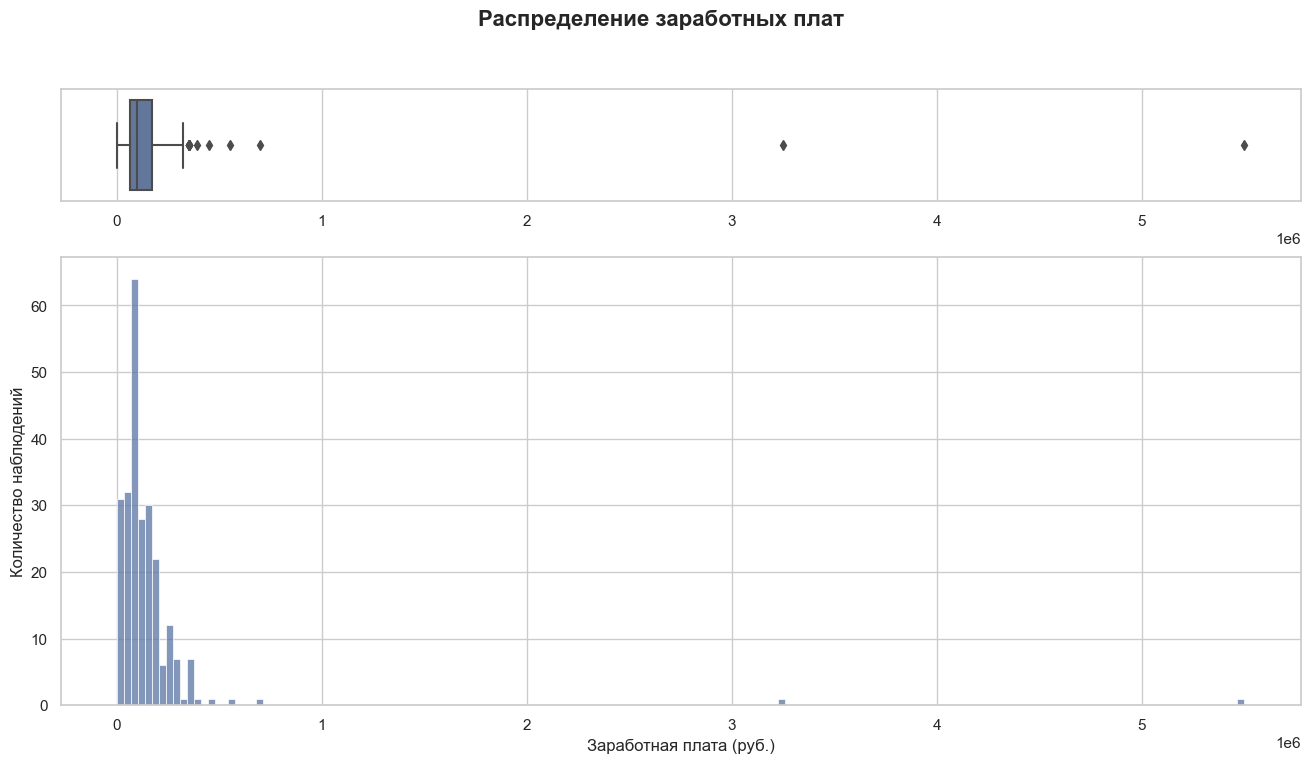

In [46]:
fig, axes = plt.subplots(
    nrows=2, ncols=1, sharex=False, 
    gridspec_kw={"height_ratios": (.2, .8)},
    figsize=(16, 8)
)

sns.boxplot(data=vacancies, x='salary_num', ax=axes[0], orient='h', color='#5975A4')
sns.histplot(data=vacancies, x='salary_num', color='#5975A4')
axes[0].set_xlabel('')
axes[1].set_ylabel('Количество наблюдений', fontsize=12)
axes[1].set_xlabel('Заработная плата (руб.)', fontsize=12)

fig.suptitle('Распределение заработных плат', 
            fontsize=16,
            fontweight="bold",
)
plt.show()

Посмотрим на заработные платы более 1 миллионов и меннее 20 тысяч.

In [47]:
grid = vacancies.salary_num > 1e6
vacancies[grid]

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_to,currency_salary,name_type,published_date,description_lemmatized,skills_from_key_skills,skills_from_description,skills,salary_bin,salary_num
178,93717522,Помощник аналитика - оператор базы данных,2024-05-13 11:51:47+03:00,https://hh.ru/vacancy/93717522,Открытая,SERENE PHARMA,NaN,Ташкент,Junior (no experience),"['Работа с базами данных', 'MS PowerPoint', 'Г...",...,3500000.0,UZS,da,2024-05-13,обязанность ведение база данные мед представит...,"работа с базами данных, ms access, ms powerpoi...",,"работа с базами данных, ms access, ms powerpoi...",Больше 300 тысяч,3250000.0
575,97207792,Аналитик данных,2024-04-17 11:44:34+03:00,https://hh.ru/vacancy/97207792,Открытая,Ashley Furniture HomeStore Uzbekistan,NaN,Ташкент,Junior (no experience),[],...,7000000.0,UZS,da,2024-04-17,позиция аналитик данные обязанность сбор и ана...,,английский язык,английский язык,Больше 300 тысяч,5500000.0


Это вакансии в узбекистане, зарплата указана в местной валюте. Получим курс узбекского сума и переведем в рубли.

In [48]:
# получаем курс валют ЦБ
CB = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()

# вычисляем курс обмена
currency = vacancies.loc[grid, 'currency_salary'].iloc[0]
uzs = CB['Valute'][currency]
rates = uzs['Value'] / uzs['Nominal']

vacancies.loc[grid, 'salary_num'] = vacancies[grid].salary_num * rates

In [49]:
grid = vacancies.salary_num < 20_000
vacancies.loc[grid, ['area', 'currency_salary', 'salary_num']]

,area,currency_salary,salary_num
162,Минск,BYR,1750.0
205,Москва,USD,4500.0
206,Тбилиси,USD,4500.0
406,Москва,USD,2000.0
414,Сербия,EUR,1400.0
505,Минск,BYR,1565.0
511,Москва,USD,4000.0
762,Москва,USD,2500.0
807,Минск,USD,1500.0
873,Москва,USD,2750.0


Эти зарплаты указаны в иностранной валюте получим курс и конвертируем зарплату.

In [50]:
def convert_salary(row: pd.Series, cb: dict) -> float:
    """
    Конвертирует зарплату из валюты вакансии в рубли на основе курса ЦБ.

    Функция проверяет валюту зарплаты и конвертирует её в рубли, используя
    текущий курс Центрального Банка, содержащийся в словаре cb.

    Parameters:
    row (pd.Series): Строка DataFrame, содержащая информацию о зарплате и валюте.
    cb (dict): Словарь с данными о курсах валют от Центрального Банка.

    Returns:
    float: Зарплата в рублях после конвертации.
    """
    
    # Если валюта зарплаты указана как BYR, конвертируем её в BYN
    if row['currency_salary'] == 'BYR':
        row['currency_salary'] = 'BYN'
    
    # Получаем курс валюты из словаря CB
    dic = cb['Valute'][row['currency_salary']]
    rates = dic['Value'] / dic['Nominal']
    
    # Возвращаем зарплату в рублях после конвертации
    return row['salary_num'] * rates

In [51]:
vacancies.loc[grid, 'salary_num'] = vacancies.loc[grid].apply(convert_salary, axis=1, cb=CB)

---

## Исследовательский анализ данных

---

In [62]:
vacancies.experience.value_counts()

experience
Junior+ (1-3 years)       717
Middle (3-6 years)        494
Junior (no experience)    107
Senior (6+ years)          22
Name: count, dtype: int64

In [125]:
# определим цвета для наших графиков
COLORS = {
    'da': '#A03B2A', 
    'ds': '#266292',
    'Junior (no experience)': '#A9C9DA',
    'Junior+ (1-3 years)': '#6291AE',
    'Middle (3-6 years)': '#015892',
    'Senior (6+ years)': '#001E4A', 
    }

### Посмотрим баланс аналитиков и датасаентистов в выборке

Общее количество вакансий - 1340


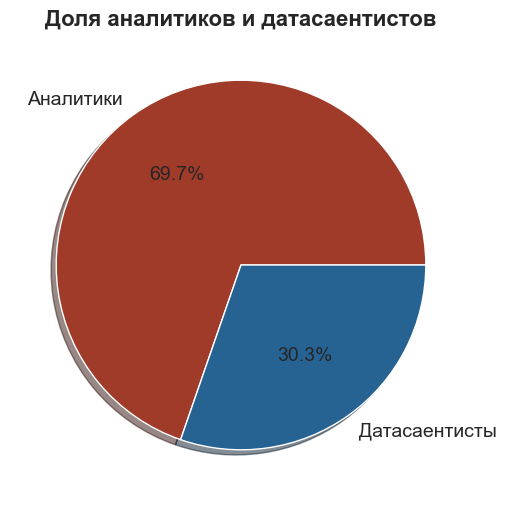

In [105]:
df = vacancies.name_type.value_counts().reset_index()
print(f'Общее количество вакансий - {vacancies.shape[0]}')
colors = [COLORS['da'], COLORS['ds']]

# Устанавливаем тему для графиков
sns.set(style="darkgrid")

# Создаем круговую диаграмму
plt.figure(figsize=(6, 6))  # Устанавливаем размер фигуры
plt.pie(
    df['count'], 
    labels=['Аналитики', 'Датасаентисты'], 
    colors=colors, 
    autopct='%1.1f%%',
    textprops={'fontsize': 14},
    shadow=True,
)

# Устанавливаем заголовок
plt.title(
    'Доля аналитиков и датасаентистов', 
    fontsize=16,
    fontweight="bold"
)

# Отображаем диаграмму
plt.show()

Вакансий аналитиков в два раза больше вакансий датасаентистов.

---

### Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science.

Общее количество вакансий аналитиков - 934
Общее количество вакансий датасаентистов - 406


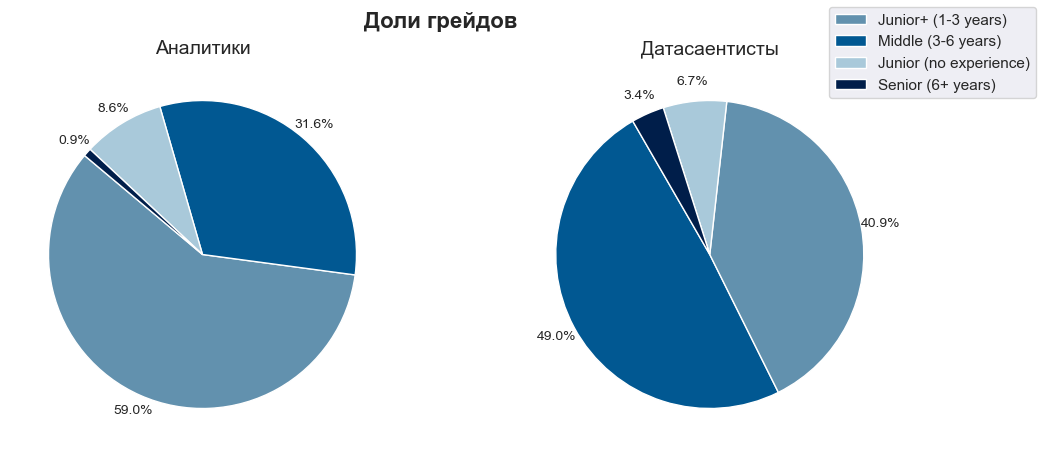

In [110]:
# получаем данные
df_da = (vacancies[vacancies.name_type == 'da'].experience.value_counts().reset_index()
      .rename(columns={'experience': 'Опыт работы', 'count': 'Количество вакансий'}))
df_ds = (vacancies[vacancies.name_type == 'ds'].experience.value_counts().reset_index()
      .rename(columns={'experience': 'Опыт работы', 'count': 'Количество вакансий'}))

# определяем цвета
colors1 = [COLORS[name] for name in df_da['Опыт работы']]
colors2 = [COLORS[name] for name in df_ds['Опыт работы']]

print(f'Общее количество вакансий аналитиков - {df_da["Количество вакансий"].sum()}')
print(f'Общее количество вакансий датасаентистов - {df_ds["Количество вакансий"].sum()}')

# Создаем фигуру и оси для двух подграфиков
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Круговая диаграмма для аналитиков
ax[0].pie(
      df_da['Количество вакансий'], 
      labels=None, 
      autopct='%1.1f%%', 
      startangle=140, 
      colors=colors1, 
      textprops={'fontsize': 10},
      pctdistance=1.11
)
ax[0].set_title('Аналитики', fontsize=14)

# Круговая диаграмма для датасаентистов
ax[1].pie(
    df_ds['Количество вакансий'], 
    autopct='%1.1f%%', 
    startangle=120, 
    colors=colors2,
    textprops={'fontsize': 10},
    pctdistance=1.13
    )
ax[1].set_title('Датасаентисты', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли грейдов', fontsize=16, fontweight='bold')

fig.legend(df_da['Опыт работы'], loc="upper right")

# Отображаем график
plt.show()

Анализ распределения грейдов показывает заметные различия между аналитиками и датасаентистами. В рядах аналитиков наибольшим спросом пользуются специалисты уровня Junior+, тогда как среди датасаентистов наиболее востребованы как Middle, так и Junior+ специалисты, которые совместно занимают лидирующие позиции. Кроме того, среди аналитиков наблюдается немного большая потребность в специалистах на уровне Junior без опыта по сравнению с датасаентистами. В то же время, среди вакансий для датасаентистов 3.4% приходится на Senior позиции, в то время как среди вакансий аналитиков доля Senior специалистов составляет менее 1%.

### Названия вакансий для аналитиков и датасаентистов

In [164]:
def plot_top_popular_values(vacancies: pd.DataFrame, column: str, *, title: str, 
                            rus_feature: str, top_n: int = 10, da_shift: float = 165, 
                            ds_shift: float = 72, height: float = 4, top: float = 0.8, 
                            wspace: float = 0.83, lower: float = 0.2) -> None:
    """
    Построение горизонтальных столбчатых диаграмм для двух категорий вакансий.

    Функция создает две горизонтальные столбчатые диаграммы, отображающие топ-N популярных значений 
    для указанного столбца в датасете вакансий, разделенных по категориям 'Аналитики данных' и 'Датасаентисты'.

    Parameters:
    vacancies (pd.DataFrame): Датафрейм с информацией о вакансиях.
    column (str): Имя столбца в датафрейме, по которому будет строиться график.
    title (str): Общий заголовок для всех графиков.
    rus_feature (str): Название оси Y на русском языке.
    top_n (int): Количество топовых значений для отображения.
    da_shift (float): Смещение текста для категории 'Аналитики данных'.
    ds_shift (float): Смещение текста для категории 'Датасаентисты'.
    height (float): Высота фигуры графика.
    top (float): Пропорция верхней части фигуры.
    wspace (float): Пропорция пространства между графиками.
    lower (float): Нижнее смещение текста на графиках.

    Returns:
    None
    """
    
    # создаем основу для двух графиков и определяем размер
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15, height)

    # получаем данные для графиков
    data_da = vacancies.loc[vacancies.name_type == 'da', column].value_counts()
    data_da_share = data_da / data_da.sum()

    data_ds = vacancies.loc[vacancies.name_type == 'ds', column].value_counts()
    data_ds_share = data_ds / data_ds.sum()

    # Создаем горизонтальную столбчатую диаграмму
    sns.barplot(x=data_da[:top_n], y=data_da.index[:top_n], color=COLORS['da'], ax=axes[0])
    sns.barplot(x=data_ds[:top_n], y=data_ds.index[:top_n], color=COLORS['ds'], ax=axes[1])

    # Добавляем текстовые метки для каждого столбца на графиках
    for i, val in enumerate(data_da_share.values[:top_n]):
        axes[0].text(da_shift, i + lower, f"{round(val*100, 1)}%", 
                     horizontalalignment='center', 
                     verticalalignment='bottom', 
                     fontdict={'fontweight':500, 'size':10, 'color': 'black'})

    for i, val in enumerate(data_ds_share.values[:top_n]):
        axes[1].text(ds_shift, i + lower, f"{round(val*100, 1)}%", 
                     horizontalalignment='center', 
                     verticalalignment='bottom', 
                     fontdict={'fontweight':500, 'size':10, 'color': 'black'})

    # Устанавливаем заголовок и размер шрифта
    fig.suptitle(title, fontsize=16, fontweight="bold")
    # устанавливаем названия
    axes[0].set_title('Аналитики данных', fontsize=14)
    axes[1].set_title('Датасаентисты', fontsize=14)
    axes[0].set_xlabel('количество наблюдений', fontsize=12)
    axes[1].set_xlabel('количество наблюдений', fontsize=12)
    axes[0].set_ylabel(rus_feature, fontsize=12)
    axes[1].set_ylabel(rus_feature, fontsize=12)
    plt.subplots_adjust(wspace=wspace, top=top)

    # Отображаем график
    plt.show()

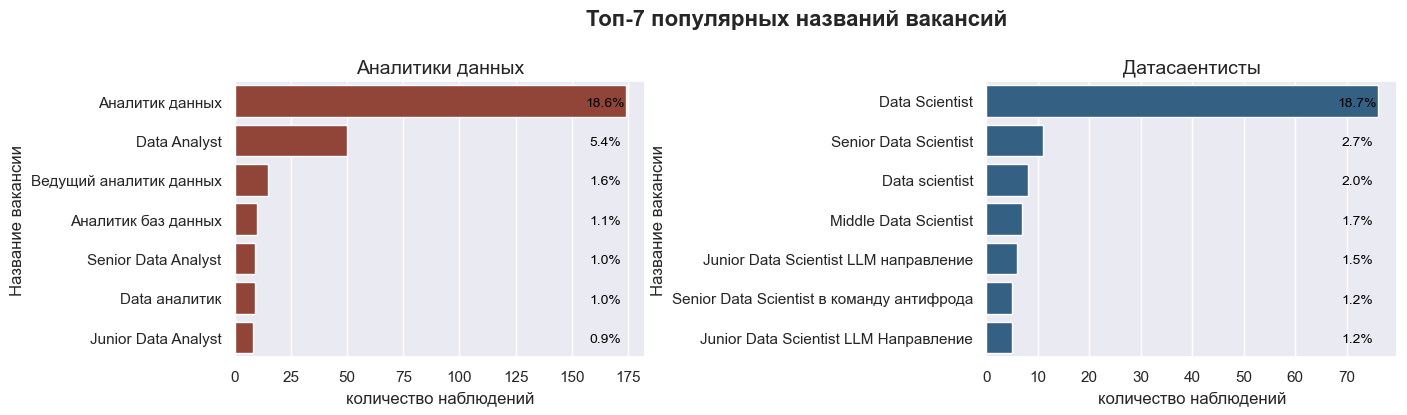

In [165]:
plot_top_popular_values(
    vacancies, 
    'name', 
    title='Топ-7 популярных названий вакансий', 
    rus_feature='Название вакансии',
    top_n=7
)

Как видно из данных, наиболее востребованными на рынке труда являются позиции "Аналитик данных", "Data Analyst" и "Data Scientist". Это говорит о том, что соискателям, вероятно, не следует усложнять название своей специализации при поиске работы. Простота и понятность названия профессии могут оказаться ключевыми в успешном трудоустройстве. Среди датасаентистов видно, что сейчас тренд на работу с большими текстовыми моделями.

---

### Топ работодателей по количеству вакансий

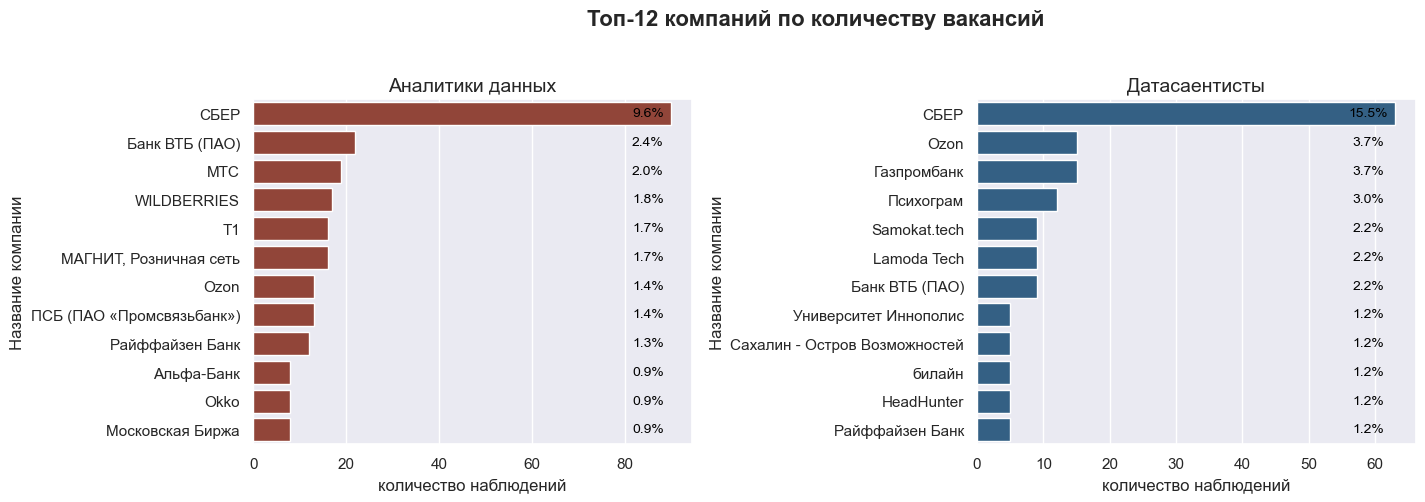

In [161]:
plot_top_popular_values(
    vacancies=vacancies,
    column='employer',
    top_n=12,
    title='Топ-12 компаний по количеству вакансий',
    rus_feature='Название компании',
    da_shift=85,
    ds_shift=59,
    height=5, 
    top=0.8,
    wspace=0.65
)

На текущем рынке труда СБЕР выделяется как неоспоримый лидер по количеству предложений о работе. Интересно отметить, что в таких компаниях, как WILDBERRIES, ВТБ и МТС, наблюдается повышенный спрос на аналитиков данных по сравнению с датасаентистами. В то же время, в компаниях OZON, Газпромбанк и Samokat.tech, наоборот, профессия датасаентиста пользуется большей популярностью, чем аналитика данных. Это подчеркивает разнообразие потребностей в специалистах по обработке данных на рынке, где каждая компания стремится найти подходящего специалиста, отвечающего её уникальным требованиям.

---

### Топ городов по количеству вакансий

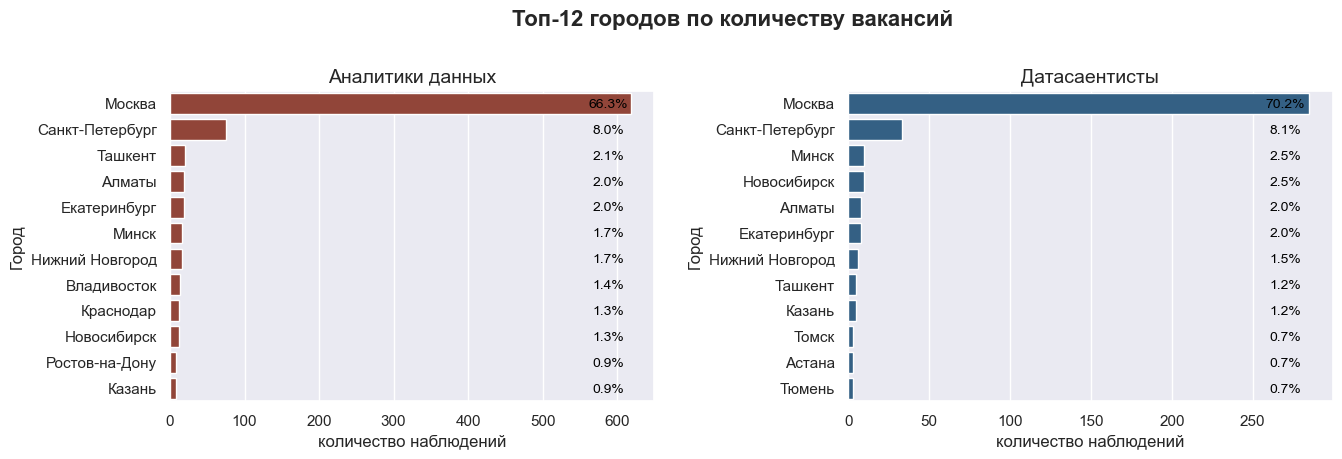

In [160]:
plot_top_popular_values(
    vacancies=vacancies,
    column='area',
    top_n=12,
    title='Топ-12 городов по количеству вакансий',
    rus_feature='Город',
    da_shift=588,
    ds_shift=270,
    height=4.5, 
    top=0.8,
    wspace=0.4,
    lower=0.27
)

Москва и Санкт-Петербург неизменно занимают лидирующие позиции по объему предложений работы, подтверждая свой статус крупнейших трудовых центров. Отдельно стоит выделить ситуацию в Ташкенте, где количество вакансий для аналитиков данных превышает число предложений для датасаентистов в четыре раза, что является ярким свидетельством специфического спроса на рынке труда данного региона.

---

## Наиболее желаемые кандидаты на вакансии Аналитик данных и Специалист по Data Science

Посмотрим какие скиллы чаще всего хочет видеть работодатель у аналитиков, и у датасаентистов.

In [200]:
def get_frequency_skill(type_name: str, experience: str) -> pd.DataFrame:
    """
    Вычисляет частоту встречаемости навыков для заданного типа вакансий и уровня опыта.

    Функция принимает тип вакансии и уровень опыта, а затем анализирует набор данных вакансий,
    чтобы определить, как часто каждый навык упоминается в соответствующих записях.

    Parameters:
    type_name (str): Тип вакансии, например 'da' для аналитиков данных.
    experience (str): Уровень опыта, например 'senior'.

    Returns:
    pd.DataFrame: DataFrame с топ-15 наиболее часто встречающимися навыками и их частотами.
    """
    
    # Словарь для подсчета частоты встречаемости навыков
    freq_skills = {}
    
    # Перебираем список навыков для заданного типа вакансий и уровня опыта
    for sequence in vacancies[(vacancies.name_type == type_name) & (vacancies.experience == experience)].skills.to_list():
        skills = sequence.split(', ')
        if skills:
            for skill in skills:
                freq_skills[skill] = freq_skills.get(skill, 0) + 1
    
    # Объединяем частоты для синонимичных навыков
    freq_skills['excel'] = freq_skills.get('ms excel', 0) + freq_skills.get('excel', 0)
    freq_skills.pop('ms excel', None)
    
    freq_skills['power bi'] = freq_skills.get('ms power bi', 0) + freq_skills.get('power bi', 0)
    freq_skills.pop('ms power bi', None)
    
    freq_skills['powerpoint'] = freq_skills.get('ms powerpoint', 0) + freq_skills.get('powerpoint', 0)
    freq_skills.pop('ms powerpoint', None)
    
    freq_skills['spark'] = freq_skills.get('pyspark', 0) + freq_skills.get('spark', 0)
    freq_skills.pop('pyspark', None)
    
    # Удаляем навык 'анализ данных', так как он слишком общий
    freq_skills.pop('анализ данных', None)
    freq_skills.pop('machine learning', None)
    
    # Сортируем навыки по убыванию частоты встречаемости
    freq_skills = dict(sorted(freq_skills.items(), key=lambda item: item[1], reverse=True))
    
    # Ограничиваем список до топ-15 навыков
    skill = list(freq_skills.keys())[:15]
    freq = list(freq_skills.values())[:15]
    
    # Создаем DataFrame и сортируем его по частоте встречаемости
    return pd.DataFrame({'Скилл': skill, 'Частота встречаемости': freq}).sort_values(by='Частота встречаемости', ascending=False)


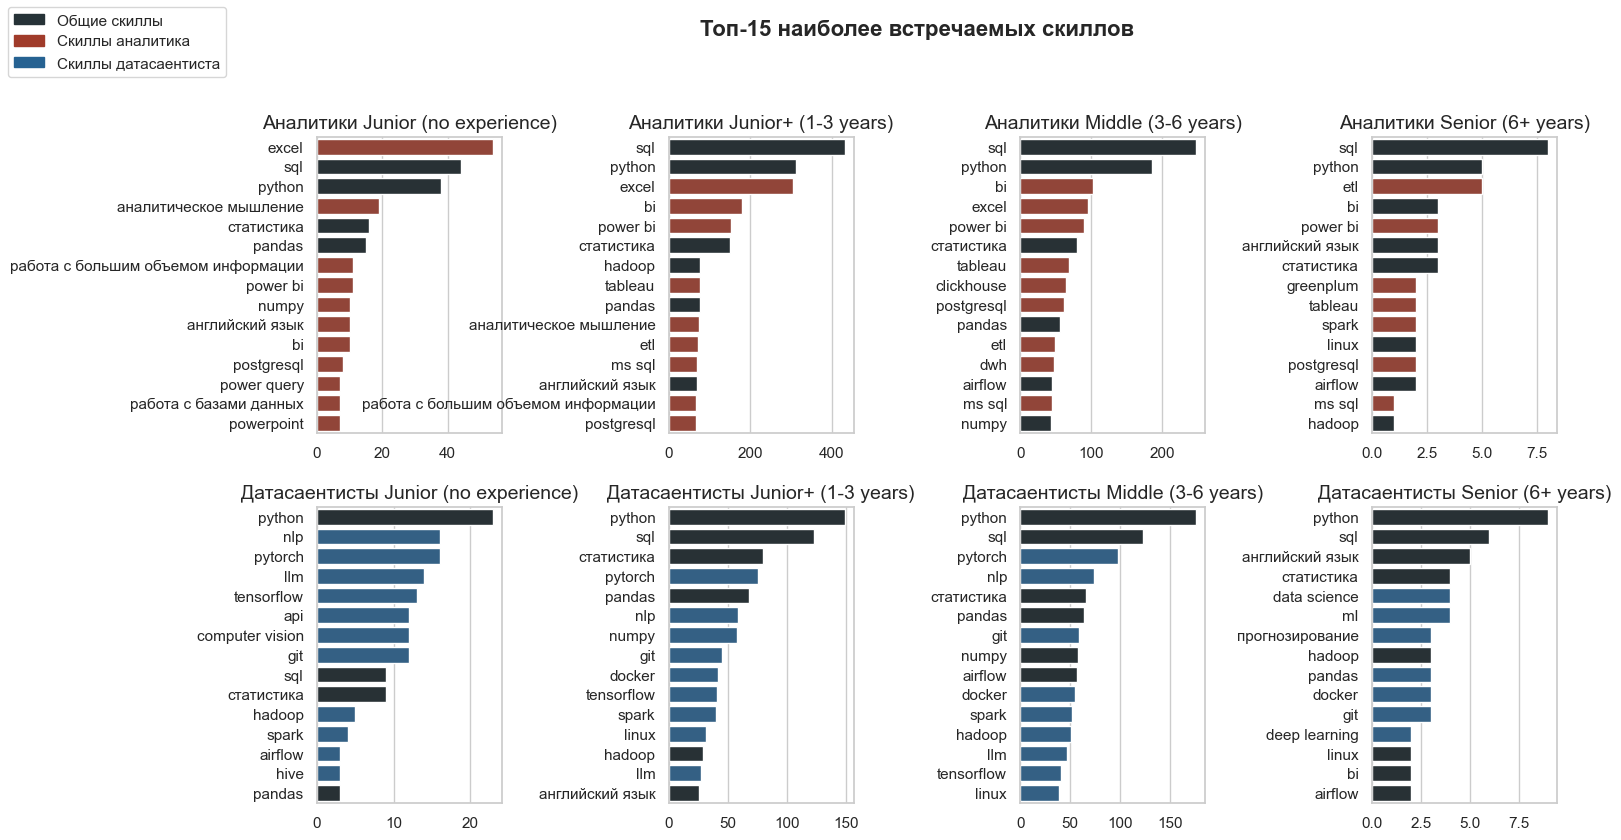

In [226]:
# Создаем фигуру с сеткой подграфиков
fig, axes = plt.subplots(2, 4, figsize=(16, 9))
fig.suptitle('Топ-15 наиболее встречаемых скиллов', fontsize=16, fontweight='bold')

grades = ("Junior (no experience)", 
          "Junior+ (1-3 years)", 
          "Middle (3-6 years)", 
          "Senior (6+ years)")

# Создаем столбчатые диаграммы для каждого уровня опыта
for i, name_experience in enumerate(grades):
    freq_skills_da = get_frequency_skill('da', name_experience)
    freq_skills_ds = get_frequency_skill('ds', name_experience)

    # Определяем общие и уникальные скиллы
    common_skills = set(freq_skills_da['Скилл']).intersection(set(freq_skills_ds['Скилл']))
    da_unique_skills = set(freq_skills_da['Скилл']).difference(common_skills)
    ds_unique_skills = set(freq_skills_ds['Скилл']).difference(common_skills)

    # Устанавливаем цвета для скиллов
    freq_skills_da['color'] = freq_skills_da['Скилл'].apply(
        lambda x: '#263237' if x in common_skills else COLORS['da']
        )
    freq_skills_ds['color'] = freq_skills_ds['Скилл'].apply(
        lambda x: '#263237' if x in common_skills else COLORS['ds']
        )
    
    # Аналитики
    sns.barplot(x='Частота встречаемости', y='Скилл', data=freq_skills_da,
                palette=freq_skills_da['color'], ax=axes[0, i])
    axes[0, i].set_title(f"Аналитики {name_experience}", fontsize=14)
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('')
    
    # Датасаентисты
    sns.barplot(x='Частота встречаемости', y='Скилл', data=freq_skills_ds,
                palette=freq_skills_ds['color'], ax=axes[1, i])
    axes[1, i].set_title(f"Датасаентисты {name_experience}", fontsize=14)
    axes[1, i].set_xlabel('')
    axes[1, i].set_ylabel('')

# настраиваем расположение графиков
black_patch = mpatches.Patch(color='#263237', label='Общие скиллы')
analyst_patch = mpatches.Patch(color=COLORS['da'], label='Скиллы аналитика')
datascience_patch = mpatches.Patch(color=COLORS['ds'], label='Скиллы датасаентиста')
plt.subplots_adjust(wspace=0.9, hspace=0.25, top=0.85)
fig.legend(handles=[black_patch, analyst_patch, datascience_patch], loc='upper left')
plt.show()


Изучение рынка вакансий показывает, что независимо от уровня и специализации, работодатели ценят знание SQL, Python и основ статистики у кандидатов. Для аналитиков на всех уровнях, кроме Senior, важен навык работы с Excel, тогда как для более опытных аналитиков этот инструмент уже не является приоритетным. Отличительной чертой для вакансий аналитиков является также умение работать с BI системами, такими как Power BI и Tableau. При переходе на уровень Junior+ аналитика, приобретает значение владение ETL процессами и инструментами, включая Airflow. Для Senior аналитиков ключевыми становятся знания Spark и Greenplum.

Вакансии датасаентистов выделяются требованиями к специализированным навыкам в области машинного обучения, включая ML, PyTorch и NLP, а также востребованностью таких инструментов, как Docker и Spark. Кроме того, для специалистов Data Science на всех уровнях необходимо знание системы контроля версий Git.

---

## Определение типичного места работы для Аналитика данных и специалист по Data Science

---

In [235]:
def plot_top(vacancies: pd.DataFrame, feature: str, title: str) -> None:
    """
    Создает столбчатые диаграммы для различных уровней опыта аналитиков и датасаентистов.

    Функция принимает DataFrame с вакансиями, название интересующего признака и заголовок графика.
    Строит столбчатые диаграммы для топ-10 значений указанного признака для каждой группы опыта.

    Parameters:
    vacancies (pd.DataFrame): DataFrame с информацией о вакансиях.
    feature (str): Название признака для анализа.
    title (str): Заголовок для всей сетки графиков.
    """
    
    # Создаем фигуру с сеткой подграфиков
    fig, axes = plt.subplots(2, 4, figsize=(18, 7))
    fig.suptitle(title, fontsize=16)
    
    # Определяем уровни опыта
    grades = ("Junior (no experience)", 
              "Junior+ (1-3 years)", 
              "Middle (3-6 years)", 
              "Senior (6+ years)")
    
    # Создаем столбчатые диаграммы для каждого уровня опыта
    for i, name_experience in enumerate(grades):
        # Получаем топ-10 значений для аналитиков
        top_da = vacancies[
            (vacancies.name_type == 'da') & (vacancies.experience == name_experience)
            ][feature].value_counts()[:10]
        # Получаем топ-10 значений для датасаентистов
        top_ds = vacancies[
            (vacancies.name_type == 'ds') & (vacancies.experience == name_experience)
            ][feature].value_counts()[:10]
    
        # Рисуем столбчатые диаграммы для аналитиков
        sns.barplot(y=top_da.index, x=top_da, color=COLORS['da'], ax=axes[0, i])
        # Рисуем столбчатые диаграммы для датасаентистов
        sns.barplot(y=top_ds.index, x=top_ds, color=COLORS['ds'], ax=axes[1, i])
        
        # Устанавливаем подзаголовки для каждого подграфика
        axes[0, i].set_title(f"Аналитики {name_experience}")
        axes[1, i].set_title(f"Датасаентисты {name_experience}")
    
    plt.subplots_adjust(wspace=1.4, hspace=0.25, top=0.85)
    # Отображаем график
    plt.show()


Рассмотрим топ-10 работодателей по количеству вакансий

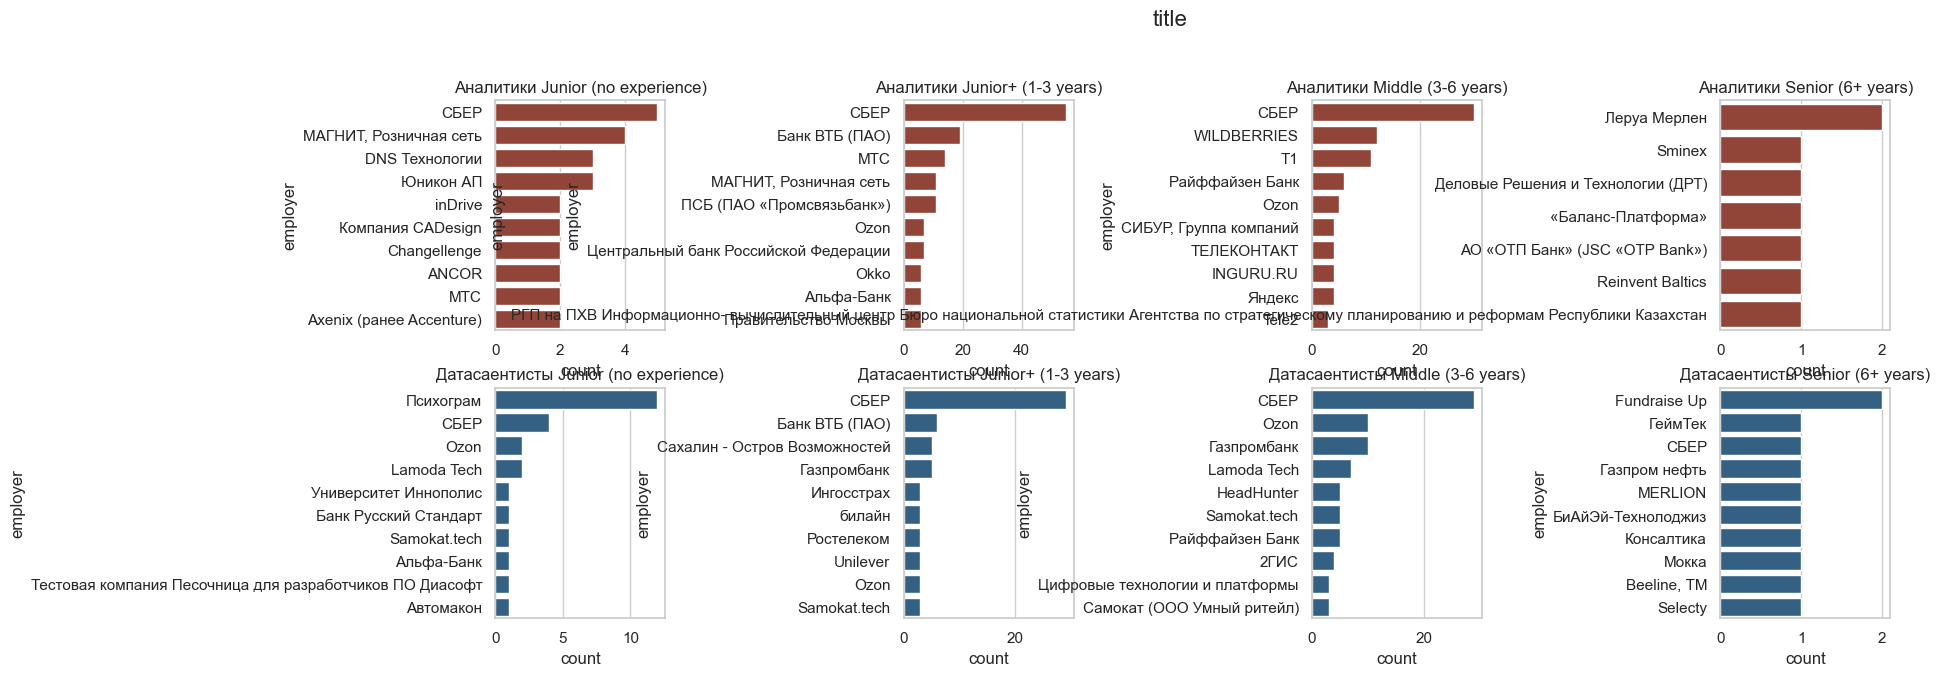

In [236]:
plot_top(vacancies, 'employer', 'title')

Анализируя рынок труда, можно отметить, что Сбербанк доминирует по количеству вакансий, исключая позиции Senior, где Леруа Мерлен выходит на первое место. Магнит также выделяется как один из лидеров в привлечении джуниор-аналитиков и датасаентистов, как с опытом, так и без. Банк ВТБ занимает прочное второе место по числу предложений для начинающих аналитиков и специалистов по данным с небольшим опытом. Онлайн-ритейлеры, такие как OZON и Wildberries, также активно ищут новые кадры, предлагая множество вакансий в этих сегментах.

In [71]:
def plot_share(feature: str, title: str):
    fig = make_subplots(
            rows=2, cols=4, 
            subplot_titles=("Аналитики Junior (no experince)", 
                            "Аналитики Junior+ (1-3 years)", 
                            "Аналитики Middle (3-6 years)", 
                            "Аналитики Senior (6+ years)", 
                            "Датасаентисты Junior (no experince)", 
                            "Датасаентисты Junior+ (1-3 years)", 
                            "Датасаентисты Middle (3-6 years)", 
                            "Датасаентисты Senior (6+ years)"),
            vertical_spacing=0.03,
            horizontal_spacing=0.16,
             specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], 
                    [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
        )
    
    grades = ("Junior (no experince)", 
                  "Junior+ (1-3 years)", 
                  "Middle (3-6 years)", 
                  "Senior (6+ years)")
    
    for i, name_experience in enumerate(grades):    
        da_share = vacancies.loc[(vacancies['experience'] == name_experience) & (vacancies.name_type == 'da'), feature].value_counts()
        ds_share = vacancies.loc[(vacancies['experience'] == name_experience) & (vacancies.name_type == 'ds'), feature].value_counts()
    
        fig.add_trace(go.Pie(labels=da_share.index, values=da_share),
                      1, i + 1)
        fig.add_trace(go.Pie(labels=ds_share.index, values=ds_share),
                      2, i + 1)
    
    # Use `hole` to create a donut-like pie chart
    fig.update_layout(
            height=1100, width=1600, 
            title_text=title, 
            showlegend=True,
            template="plotly_dark",   
        )
    
    
    fig.update_traces(textposition='outside', hoverinfo='label+value', 
                      textinfo='percent+label', textfont_size=12,
                      marker=dict(line=dict(color='#FFFFFF', width=2))
                     )
    fig.show()

Рассмотрим распределение типов занятости

In [72]:
plot_share('employment', 'Распределение типа занятости')

Из анализа данных рынка труда следует, что для большинства категорий специалистов, за исключением начинающих аналитиков без опыта, тип занятости, указанный в вакансиях, в основном представлен полной занятостью. Однако 13% вакансий для джуниор-аналитиков предлагают стажировку, в то время как для джуниор-датасаентистов доля стажировок составляет более 30%, и почти такой же процент приходится на проектную работу.

Рассмотрим распределение графика работы

In [73]:
plot_share('schedule', 'Распределение графика работы')

Из данных следует, что с увеличением требуемого уровня опыта у кандидатов на позиции аналитиков возрастает и доля вакансий, предлагающих возможность удаленной работы. В то же время, в сфере Data Science наблюдается обратная тенденция: только половина вакансий для начинающих специалистов без опыта предусматривают полный рабочий день. Для более опытных специалистов этот показатель увеличивается до 65% и выше.

Посмотрим медианную заработную плату по каждой категории.

In [ ]:
salary = vacancies.groupby(['name_type', 'experience'], as_index=False).agg({'salary_num': 'median'})
salary['name_type'] = salary.name_type.map({'da': 'Аналитик данных', 'ds': 'Датасаентист'})
salary.rename(columns={'name_type': 'Вакансия', 'experience': 'Опыт работы', 'salary_num': 'Медианная зарплата'}, inplace=True)

display(salary.style.format(
    "{:.0f}",
    subset='Медианная зарплата'  
).background_gradient(
    subset='Медианная зарплата',
    cmap='Reds',  
    axis=0
))

,Вакансия,Опыт работы,Медианная зарплата
0,Аналитик данных,Junior (no experince),60000
1,Аналитик данных,Junior+ (1-3 years),102500
2,Аналитик данных,Middle (3-6 years),180000
3,Аналитик данных,Senior (6+ years),274104
4,Датасаентист,Junior (no experince),30000
5,Датасаентист,Junior+ (1-3 years),200000
6,Датасаентист,Middle (3-6 years),280000
7,Датасаентист,Senior (6+ years),300000


Видно что зарплаты Аналитика(с соответствующим опытом работы) немногим меньше, чем зарплата датасаентиста, за исключением специалистов без опыта работы. Это может быть потому что у датасаентистов без опыта, больше стажировок в вакансиях, а у стажера все таки зарплата меньше.